In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import os
os.chdir('../')

In [3]:
from run_utils import read_data

/Users/gadzhiev-im/miniconda3/envs/tf_kp/lib/python3.10/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [4]:
data, data_test, categories = read_data(
    './data/All_browse_data_без_погружения_19971021_20230107_с_пропусками.csv')

data.head()

,year,month,day,hour from,hour to,doySin,hourSin,doyCos,hourCos,Dst,...,lg(E>2 MeV),E>2 MeV G16,lg(E>2 MeV) G16,CH_rca (193),CH_rca (211),SW_spd_frcst (193),SW_spd_frcst (211),Unnamed: 62,category,dttm
0,1997,10,21,0,1,-0.505271,0.991445,-0.862961,-0.130526,-14,...,0.715307,334.227975,2.524043,0.97,0.77,510.815165,482.241598,NaN,0,1997-10-21 00:00:00
1,1997,10,21,3,4,-0.507126,0.608761,-0.861872,-0.793353,-13,...,0.318573,334.227975,2.524043,0.97,0.77,510.815165,482.241598,NaN,0,1997-10-21 03:00:00
2,1997,10,21,6,7,-0.508980,-0.130526,-0.860779,-0.991445,-15,...,0.070838,334.227975,2.524043,0.97,0.77,510.815165,482.241598,NaN,0,1997-10-21 06:00:00
3,1997,10,21,9,10,-0.510831,-0.793353,-0.859681,-0.608761,-13,...,0.501584,334.227975,2.524043,0.97,0.77,510.815165,482.241598,NaN,0,1997-10-21 09:00:00
4,1997,10,21,12,13,-0.512679,-0.991445,-0.858580,0.130526,-10,...,1.011042,334.227975,2.524043,0.97,0.77,510.815165,482.241598,NaN,0,1997-10-21 12:00:00


In [5]:
data = pd.concat([data, data_test], ignore_index=True)

In [21]:
data.category.value_counts(normalize=True)

0    0.577565
1    0.309623
2    0.112812
Name: category, dtype: float64

<AxesSubplot: xlabel='dttm'>

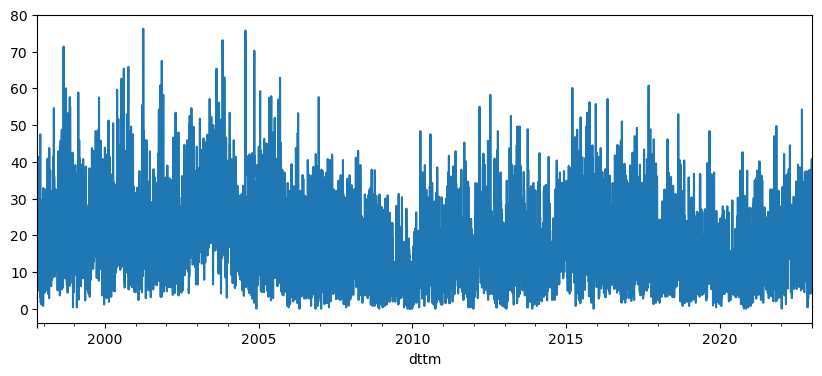

In [15]:
(
    data.groupby(pd.Grouper(key="dttm", freq="d"))
    ["Kp*10"].mean()
    .sort_index()
    .plot(figsize=(10, 4))
)

Text(0, 0.5, 'Kp')

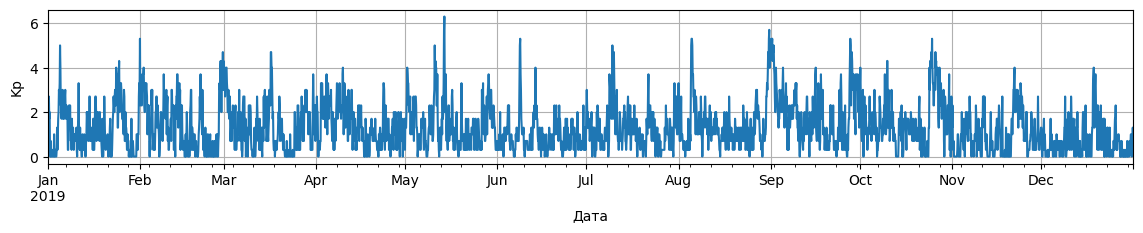

In [26]:
(
    data
    .set_index("dttm")["Kp*10"]
    .sort_index()
    .divide(10)
    .last('365d')
    .plot(figsize=(14, 2))
)

plt.grid()

plt.xlabel("Дата")
plt.ylabel("Kp")

Text(0.5, 0, 'Дата')

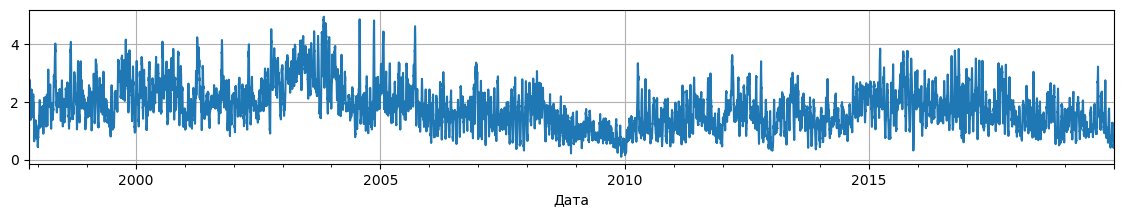

In [28]:
(
    data
    .set_index("dttm")["Kp*10"]
    .sort_index()
    .rolling(7 * 24 // 3)
    .mean()
    .divide(10)
    .plot(figsize=(14,2))
)

plt.grid()
plt.xlabel("Дата")

In [22]:
data, data_test, categories = read_data(
    './data/All_browse_data_без_погружения_19971021_20230107_с_пропусками.csv')

data.head()

,year,month,day,hour from,hour to,doySin,hourSin,doyCos,hourCos,Dst,...,lg(E>2 MeV),E>2 MeV G16,lg(E>2 MeV) G16,CH_rca (193),CH_rca (211),SW_spd_frcst (193),SW_spd_frcst (211),Unnamed: 62,category,dttm
0,1997,10,21,0,1,-0.505271,0.991445,-0.862961,-0.130526,-14,...,0.715307,334.227975,2.524043,0.97,0.77,510.815165,482.241598,NaN,0,1997-10-21 00:00:00
1,1997,10,21,3,4,-0.507126,0.608761,-0.861872,-0.793353,-13,...,0.318573,334.227975,2.524043,0.97,0.77,510.815165,482.241598,NaN,0,1997-10-21 03:00:00
2,1997,10,21,6,7,-0.508980,-0.130526,-0.860779,-0.991445,-15,...,0.070838,334.227975,2.524043,0.97,0.77,510.815165,482.241598,NaN,0,1997-10-21 06:00:00
3,1997,10,21,9,10,-0.510831,-0.793353,-0.859681,-0.608761,-13,...,0.501584,334.227975,2.524043,0.97,0.77,510.815165,482.241598,NaN,0,1997-10-21 09:00:00
4,1997,10,21,12,13,-0.512679,-0.991445,-0.858580,0.130526,-10,...,1.011042,334.227975,2.524043,0.97,0.77,510.815165,482.241598,NaN,0,1997-10-21 12:00:00


Text(0, 0.5, 'Kp')

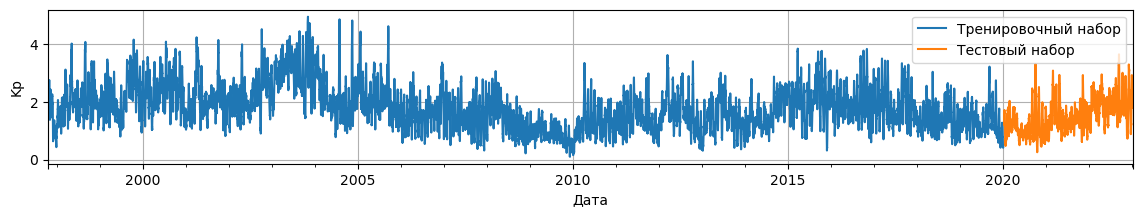

In [25]:
(
    data
    .set_index("dttm")["Kp*10"]
    .sort_index()
    .rolling(7 * 24 // 3)
    .mean()
    .divide(10)
    .plot(figsize=(14, 2), label="Тренировочный набор")
)

(
    data_test
    .set_index("dttm")["Kp*10"]
    .sort_index()
    .rolling(7 * 24 // 3)
    .mean()
    .divide(10)
    .plot(label="Тестовый набор")
)

plt.grid()
plt.legend()
plt.xlabel("Дата")
plt.ylabel("Kp")
